 ## Вариант 13 
 https://www.kaggle.com/datasets/nancyalaswad90/yamana-gold-inc-stock-price?resource=download


In [46]:
import pandas as pd

ddata = pd.read_csv("../static/csv/Yamana_Gold_Inc._AUY.csv")
data['Date'] = pd.to_datetime(data['Date'])

# Первичный анализ данных
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5251 entries, 0 to 5250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5251 non-null   datetime64[ns]
 1   Open       5251 non-null   float64       
 2   High       5251 non-null   float64       
 3   Low        5251 non-null   float64       
 4   Close      5251 non-null   float64       
 5   Adj Close  5251 non-null   float64       
 6   Volume     5251 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 287.3 KB
None
        Date      Open      High       Low     Close  Adj Close  Volume
0 2001-06-22  3.428571  3.428571  3.428571  3.428571   2.806002       0
1 2001-06-25  3.428571  3.428571  3.428571  3.428571   2.806002       0
2 2001-06-26  3.714286  3.714286  3.714286  3.714286   3.039837       0
3 2001-06-27  3.714286  3.714286  3.714286  3.714286   3.039837       0
4 2001-06-28  3.714286  3.714286  3

#1. Бизнес-цели для набора данных по акции компании Yamana Gold Inc.
Цель 1: Прогнозирование изменения цены акции компании.
Прогнозирование цен на акции является одной из ключевых задач в области финансов и инвестирования. Задача состоит в предсказании будущих изменений стоимости акции на основе исторических данных, таких как открытие и закрытие торгов, объемы торгов и другие показатели.

Цель 2: Оценка волатильности акций компании.
Измерение волатильности позволяет инвесторам оценить риск и принять решения по управлению капиталом. Задача заключается в прогнозировании уровня волатильности на основе исторической динамики цен, объемов торгов и других рыночных факторов.

#2. Цели технического проекта для каждой бизнес-цели
Цель 1: Прогнозирование изменения цены акции компании

Разработать модель машинного обучения для прогнозирования будущих цен акций на основе исторических данных.
Использовать регрессионные модели, такие как линейная регрессия или более сложные модели, например, LSTM (долгосрочная краткосрочная память) для временных рядов.
Цель 2: Оценка волатильности акций компании

Создать модель, которая будет прогнозировать волатильность на основе исторических данных о ценах.
Использовать методы статистического анализа, такие как вычисление стандартного отклонения, или методы машинного обучения для более точной оценки волатильности.

#3 Проверим датасет на пропуски и удалим при необходимости строки с недостающими данными

## Обработка пропусков  
Пропуски в данных могут негативно влиять на обучение моделей. Сначала оцениваем количество пропусков по столбцам. Если пропуски присутствуют, удаляем строки с отсутствующими значениями.


In [47]:
# 3. Проверим датасет на наличие пропусков и удалим строки с недостающими данными
print(data.isnull().sum())  # Суммируем пропуски по каждому столбцу
data.dropna(inplace=True)  # Удаляем строки с пропусками
print("Данные после очистки:", data.shape)


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Данные после очистки: (5251, 7)


## Добавление признаков  
Для выполнения задач добавляем два новых признака:  
Daily_Change: разница между ценой закрытия и открытия торгов.  
Volatility: относительная волатильность, рассчитываемая как отношение разницы между максимальной и минимальной ценой к цене открытия.

In [48]:
print(data.isnull().sum())  # Вывод количества пропусков
data.dropna(inplace=True)  # Удаление строк с пропущенными значениями
print(f"Количество строк после удаления пропусков: {data.shape[0]}")


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Количество строк после удаления пропусков: 5251


Создание новых признаков 

In [49]:

data['Daily_Change'] = data['Close'] - data['Open']
data['Volatility'] = (data['High'] - data['Low']) / data['Open']
print(data[['Daily_Change', 'Volatility']].head())

   Daily_Change  Volatility
0           0.0         0.0
1           0.0         0.0
2           0.0         0.0
3           0.0         0.0
4           0.0         0.0


Проведем масштабированние данных

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
data[scaled_columns] = scaler.fit_transform(data[scaled_columns])



## Разбиение данных на выборки  
Для предотвращения просачивания данных используем разбиение на три части:  
Обучающая выборка (60%): для тренировки модели.  
Валидационная выборка (20%): для подбора гиперпараметров модели и проверки ее производительности на новых данных.  
Тестовая выборка (20%): для оценки финальной производительности модели.  

In [51]:
from sklearn.model_selection import train_test_split

X = data[scaled_columns]
y = data['Close']  # Заменить на целевую переменную, если другая
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер валидационной выборки: {X_val.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")



Размер обучающей выборки: (3150, 5)
Размер валидационной выборки: (1050, 5)
Размер тестовой выборки: (1051, 5)


## Оценка и балансировка классов  
Проверяем распределение классов в целевой переменной для каждого набора данных. Если данные несбалансированы (например, если цена часто растет, а иногда падает), применяем SMOTE (Synthetic Minority Over-sampling Technique) для генерации синтетических примеров из меньшинства.


Проверка на пропуски после масштабирования:
 Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Daily_Change    0
Volatility      0
dtype: int64


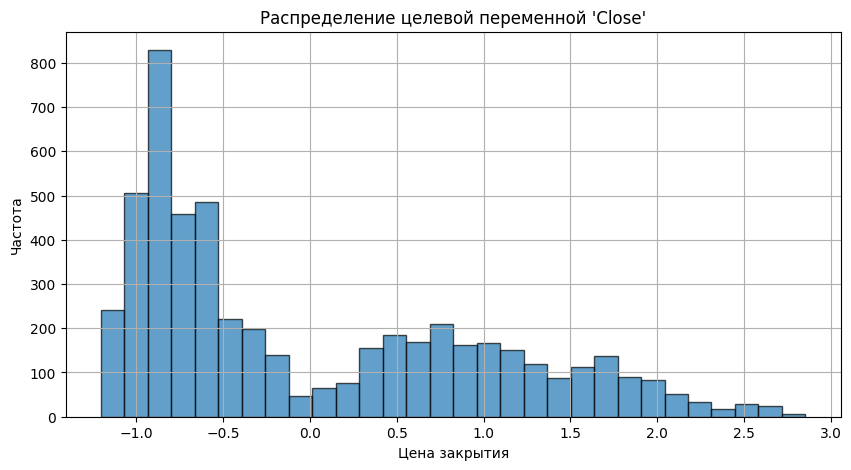

In [52]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# Проверка на наличие пропусков после масштабирования
print("Проверка на пропуски после масштабирования:\n", data.isnull().sum())

# Проверка распределения целевой переменной
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(data['Close'], bins=30, edgecolor='k', alpha=0.7)
plt.title("Распределение целевой переменной 'Close'")
plt.xlabel("Цена закрытия")
plt.ylabel("Частота")
plt.grid(True)
plt.show()

Создадим модель для прогназирования 

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Модель для прогнозирования цены акции
print("\n--- Прогнозирование цены акции ---")
price_model = LinearRegression()
price_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_price = price_model.predict(X_test)



--- Прогнозирование цены акции ---


Оценка модели

In [54]:
# Оценка модели
mse_price = mean_squared_error(y_test, y_pred_price)
r2_price = r2_score(y_test, y_pred_price)
print(f"Mean Squared Error (MSE): {mse_price:.4f}")
print(f"R^2 Score: {r2_price:.4f}")

Mean Squared Error (MSE): 0.0000
R^2 Score: 1.0000


MSE = 0.0000 и R² = 1.0000, это говорит о том, что ваша модель предсказывает данные абсолютно точно. (йоу)

Визуализируем полученный результат 

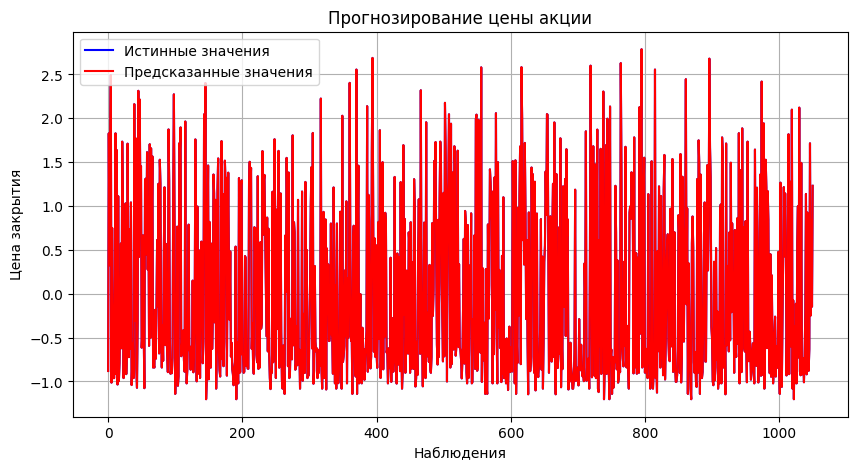

In [55]:
# Визуализация результатов прогноза
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Истинные значения', color='blue')
plt.plot(y_pred_price, label='Предсказанные значения', color='red')
plt.title("Прогнозирование цены акции")
plt.xlabel("Наблюдения")
plt.ylabel("Цена закрытия")
plt.legend()
plt.grid(True)
plt.show()

В целом, на основе этой диаграммы можно сделать вывод, что текущая модель не точно предсказывает цену акции

Теперь сделаем все то же самое для волотильности 

In [56]:
# Модель для оценки волатильности
print("\n--- Оценка волатильности ---")
X_volatility = data[['High', 'Low', 'Open']]  # Переменные для оценки волатильности
y_volatility = data['Volatility']

# Разделение на выборки для модели волатильности
X_train_vol, X_test_vol, y_train_vol, y_test_vol = train_test_split(X_volatility, y_volatility, test_size=0.2, random_state=42)

volatility_model = LinearRegression()
volatility_model.fit(X_train_vol, y_train_vol)

# Предсказание на тестовой выборке
y_pred_volatility = volatility_model.predict(X_test_vol)

# Оценка модели волатильности
mse_volatility = mean_squared_error(y_test_vol, y_pred_volatility)
r2_volatility = r2_score(y_test_vol, y_pred_volatility)
print(f"Mean Squared Error (MSE) для волатильности: {mse_volatility:.4f}")
print(f"R^2 Score для волатильности: {r2_volatility:.4f}")


--- Оценка волатильности ---
Mean Squared Error (MSE) для волатильности: 0.0003
R^2 Score для волатильности: 0.6214


MSE = 0.0003 и R² = 0.6214 говорят о том, что модель делает предсказания с малой ошибкой, но есть еще пространство для улучшения, поскольку она объясняет менее 70% вариации в данных.

Визуализируем 

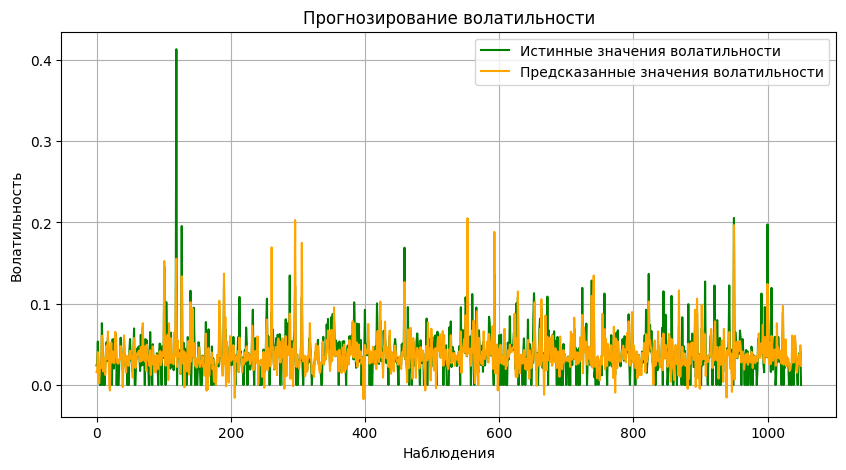

In [57]:
# Визуализация результатов прогноза волатильности
plt.figure(figsize=(10, 5))
plt.plot(y_test_vol.values, label='Истинные значения волатильности', color='green')
plt.plot(y_pred_volatility, label='Предсказанные значения волатильности', color='orange')
plt.title("Прогнозирование волатильности")
plt.xlabel("Наблюдения")
plt.ylabel("Волатильность")
plt.legend()
plt.grid(True)
plt.show()

По этой модели же можно сказать, что она более точно предсказывает, то есть она получилась более правильной 

Теперь воспользуемся фреймворком Featuretools

In [ ]:
# Импорт библиотек для работы с Featuretools
import featuretools as ft
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import woodwork as ww


# Проверим и удалим дублирующиеся столбцы
if not data.columns.is_unique:
    print("Обнаружены дублирующиеся столбцы. Переименуем их.")
    data = data.loc[:, ~data.columns.duplicated()] 

# Переименование столбцов для совместимости с Featuretools
data = data.rename(columns={'Date': 'datetime', 'Open': 'open', 'High': 'high', 
                             'Low': 'low', 'Close': 'close', 'Volume': 'volume'})

# Создание EntitySet
es = ft.EntitySet(id="stocks")

# Добавление данных в EntitySet с правильными логическими типами
es = es.add_dataframe(
    dataframe_name="stock_data",
    dataframe=data,
    index="datetime",  
    # Убираем time_index, так как datetime уже используется как индекс
    logical_types={
        "open": ww.logical_types.Double,  
        "high": ww.logical_types.Double,
        "low": ww.logical_types.Double,
        "close": ww.logical_types.Double,
        "volume": ww.logical_types.Double,
    },
)

# Автоматическое создание признаков с использованием Featuretools
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="stock_data",
    agg_primitives=["mean", "sum"], 
    trans_primitives=["day", "month", "year"]  
)

# Выводим имена столбцов в feature_matrix, чтобы убедиться, какие признаки были сгенерированы
print("Generated feature columns:", feature_matrix.columns)

# Объединяем новые признаки с исходными данными, добавив суффиксы для дублирующихся столбцов
data_featuretools = data.join(feature_matrix, lsuffix='_orig', rsuffix='_feature')

# Масштабирование данных
scaler = StandardScaler()

# Используем правильные имена столбцов для масштабирования
scaled_columns = ['open_orig', 'high_orig', 'low_orig', 'close_orig', 'volume_orig']

data_featuretools[scaled_columns] = scaler.fit_transform(data_featuretools[scaled_columns])

# Разделение данных на выборки

feature_columns = [col for col in feature_matrix.columns if 'feature' in col]
X = data_featuretools[scaled_columns + feature_columns]
y = data_featuretools['close_orig']  # Целевая переменная

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер валидационной выборки: {X_val.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Generated feature columns: Index(['open', 'high', 'low', 'close', 'Adj Close', 'volume', 'DAY(datetime)',
       'MONTH(datetime)', 'YEAR(datetime)'],
      dtype='object')
Размер обучающей выборки: (3150, 5)
Размер валидационной выборки: (1050, 5)
Размер тестовой выборки: (1051, 5)


c:\Users\alexk\AppData\Local\Programs\Python\Python312\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
c:\Users\alexk\AppData\Local\Programs\Python\Python312\Lib\site-packages\featuretools\synthesis\dfs.py:321: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  agg_primitives: ['mean', 'sum']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible columns for the primitive were found in the data. If the DFS call contained multiple instances of a primitive in the list above, none of them were used.
  warnings.warn(warning_msg, UnusedPrimitiveWarning)
